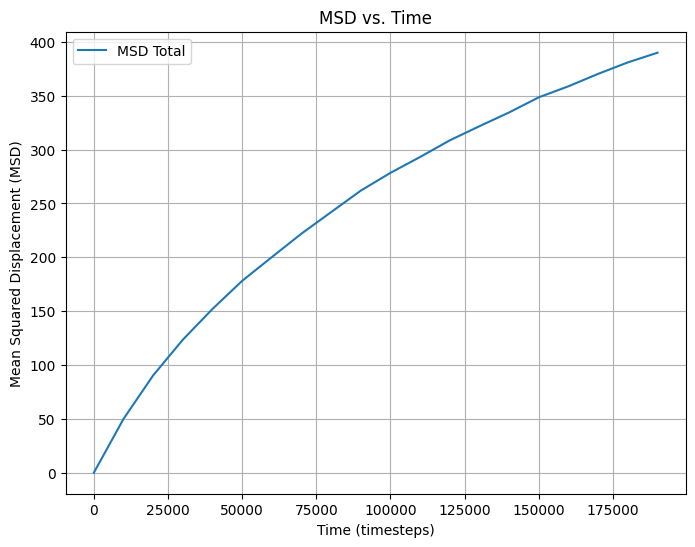

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the file name
filename = 'msd_swi6.txt'

# Initialize lists to store time and MSD values
time = []
msd_total = []

# Read the file
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):  # Skip comment lines
            continue
        data = line.split()
        time.append(float(data[0]))
        msd_total.append(float(data[4]))  # Assuming the total MSD is the 5th column (index 4)

# Convert lists to numpy arrays for easier handling
time = np.array(time)
msd_total = np.array(msd_total)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(time, msd_total, label='MSD Total')
plt.xlabel('Time (timesteps)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD vs. Time')
plt.legend()
plt.grid(True)
plt.show()


Fitted parameters: D = 1.798535849930749, beta = 0.44038842974750536


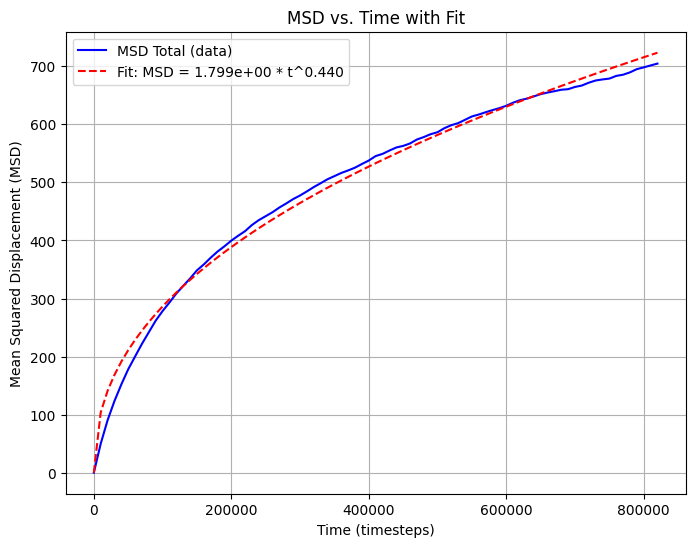

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the file name
filename = 'msd_swi6.txt'

# Initialize lists to store time and MSD values
time = []
msd_total = []

# Read the file
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):  # Skip comment lines
            continue
        data = line.split()
        time.append(float(data[0]))
        msd_total.append(float(data[4]))  # Assuming the total MSD is the 5th column (index 4)

# Convert lists to numpy arrays for easier handling
time = np.array(time)
msd_total = np.array(msd_total)

# Define the model function for fitting
def msd_model(t, D, beta):
    return D * t**beta

# Perform the curve fitting
popt, pcov = curve_fit(msd_model, time, msd_total)
D, beta = popt
print(f"Fitted parameters: D = {D}, beta = {beta}")

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(time, msd_total, 'b-', label='MSD Total (data)')
plt.plot(time, msd_model(time, D, beta), 'r--', label=f'Fit: MSD = {D:.3e} * t^{beta:.3f}')
plt.xlabel('Time (timesteps)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD vs. Time with Fit')
plt.legend()
plt.grid(True)
plt.show()
